<a href="https://colab.research.google.com/github/ppprakharr/RegressionModels/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imnporting the dependencies

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [3]:
#loading the data from csv to dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv.xls')

In [5]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Checking the datapoints

In [4]:
car_dataset.shape

(4340, 8)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [15]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())


0    2153
1    2123
2      40
3      23
4       1
Name: fuel, dtype: int64
0    3244
1     994
2     102
Name: seller_type, dtype: int64
0    3892
1     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


Encoding the categorical data

In [24]:
# encoding the fuel_type column
car_dataset.replace({'fuel' :{'Diesel':0, 'Petrol': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace=True)

# encoding the seller_type
car_dataset.replace({'seller_type':{'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}}, inplace=True)

# encoding the transmission type column
car_dataset.replace({'transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)
# encoding the fuel_type column
car_dataset.replace({'owner' :{'First Owner':1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 0}}, inplace=True)


In [25]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,2


Splitting the dataset and target

In [26]:
x=car_dataset.drop(columns=['name','selling_price'],axis=1)
y=car_dataset['selling_price']
print(x)
print(y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      1
1     2007      50000     1            0             0      1
2     2012     100000     0            0             0      1
3     2017      46000     1            0             0      1
4     2014     141000     0            0             0      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      2
4336  2014      80000     0            0             0      2
4337  2009      83000     1            0             0      2
4338  2016      90000     0            0             0      1
4339  2016      40000     1            0             0      1

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting training and test data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)

In [28]:
print(x.shape, x_train.shape, x_test.shape)

(4340, 6) (3472, 6) (868, 6)


Model Training

Linear Regression

In [29]:
# loading the linear regression model
linear_regression_model = LinearRegression()


In [30]:
linear_regression_model.fit(x_train,y_train)

LinearRegression()

Evaluating linear regression model score

In [31]:
# predicition on training data prediciton
training_data_prediction = linear_regression_model.predict(x_train)


In [32]:
#comparing the model
# R square error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('error score r square: ',error_score)

error score r square:  0.45255547523944706


Visualise the actual and predicted prices

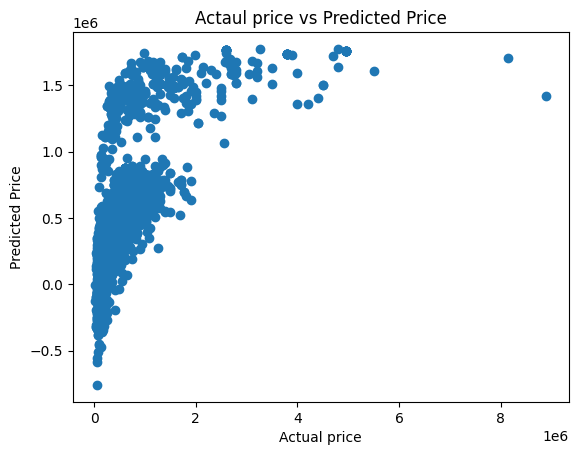

In [34]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()

In [35]:
# predicition on testing data prediciton
testing_data_prediction = linear_regression_model.predict(x_test)

In [36]:
#comparing the model
# R square error
error_score = metrics.r2_score(y_test, testing_data_prediction)
print('error score r square: ',error_score)

error score r square:  0.4420516846393103


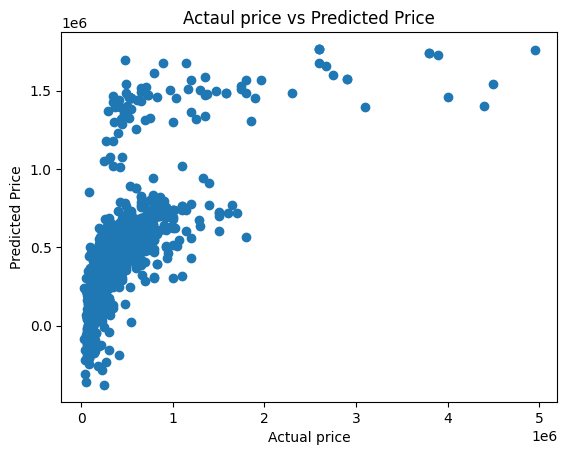

In [37]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actaul price vs Predicted Price")
plt.show()

Model Training

Lasso Regression

In [38]:
# loading the linear regression model
lasso_regression_model = Lasso()

In [39]:
lasso_regression_model.fit(x_train,y_train)

Lasso()

In [40]:
# predicition on training data prediciton
training_data_prediction = lasso_regression_model.predict(x_train)

In [41]:
#comparing the model
# R square error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('error score r square: ',error_score)

error score r square:  0.45255547519034534


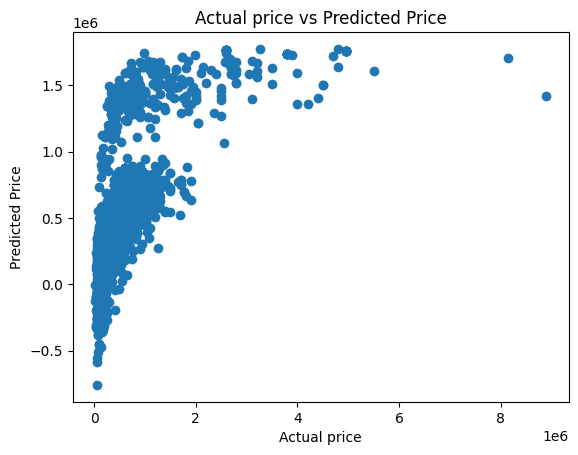

In [42]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()

In [43]:
# predicition on testing data prediciton
testing_data_prediction = lasso_regression_model.predict(x_test)

In [44]:
#comparing the model
# R square error
error_score = metrics.r2_score(y_test, testing_data_prediction)
print('error score r square: ',error_score)

error score r square:  0.44205263399745276


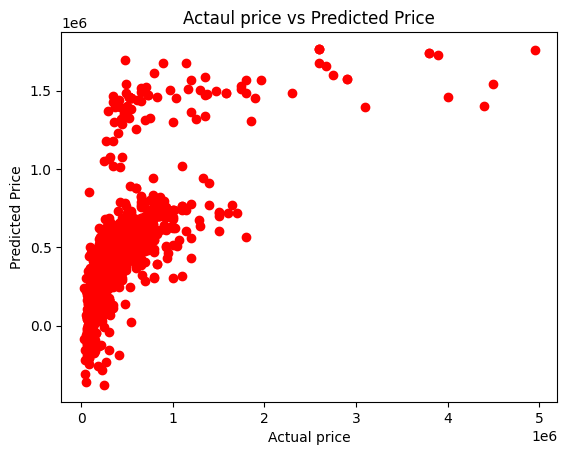

In [45]:
plt.scatter(y_test, testing_data_prediction, color='Red')
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actaul price vs Predicted Price")
plt.show()

Model Training

XGB Regressor

In [48]:
xgb_model = XGBRegressor()

In [50]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
# predicition on training data prediciton
training_data_prediction = xgb_model.predict(x_train)

In [52]:
#comparing the model
# R square error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('error score r square: ',error_score)

error score r square:  0.9349697952498182


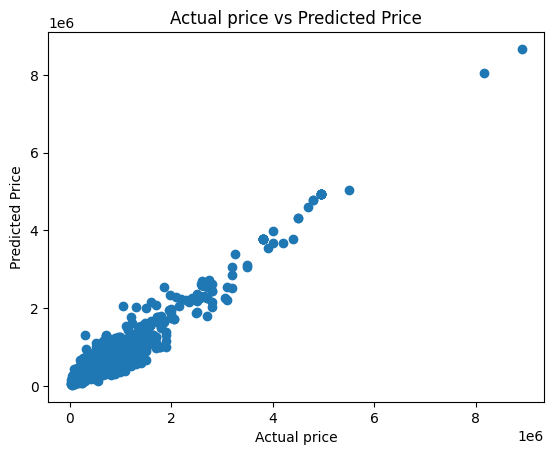

In [53]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()

In [54]:
# predicition on testing data prediciton
testing_data_prediction = xgb_model.predict(x_test)

In [55]:
#comparing the model
# R square error
error_score = metrics.r2_score(y_test, testing_data_prediction)
print('error score r square: ',error_score)

error score r square:  0.5693223635733992


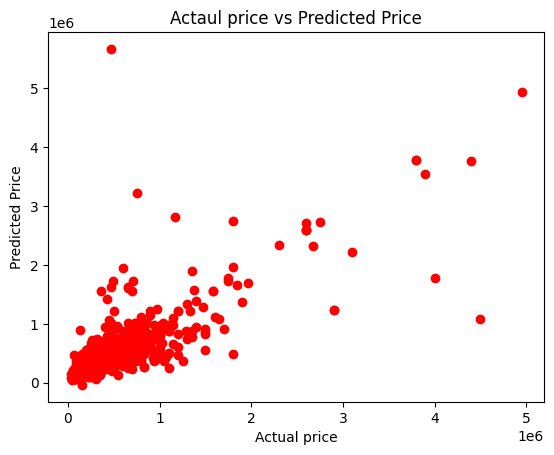

In [56]:
plt.scatter(y_test, testing_data_prediction, color='Red')
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actaul price vs Predicted Price")
plt.show()